In [1]:
import numpy as np 
import pandas as pd
import spacy

In [3]:
amazon = pd.read_csv('datasets/amazon_product_reviews.csv')

C:\Users\NewStart\AppData\Local\Temp\ipykernel_10340\76790039.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  amazon = pd.read_csv('datasets/amazon_product_reviews.csv')


In [4]:
amazon.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


Need reviews.text, reviews.title, reviews.username

In [6]:
cleaned = amazon[['reviews.text', 'reviews.title', 'reviews.username']]
cleaned

,reviews.text,reviews.title,reviews.username
0,This product so far has not disappointed. My c...,Kindle,Adapter
1,great for beginner or experienced person. Boug...,very fast,truman
2,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42
...,...,...,...
34655,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...,Kris
34656,Amazon should include this charger with the Ki...,Should be included,Jonathan Stewart
34657,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,J Lawson
34658,I was surprised to find it did not come with a...,Not worth the money,Just the Buyer


In [7]:
# are there any null values?
cleaned.isnull().sum()

reviews.text        1
reviews.title       6
reviews.username    7
dtype: int64

In [8]:
#remove null values 
cleaned.dropna(inplace=True, axis=0)

C:\Users\NewStart\AppData\Local\Temp\ipykernel_10340\4065831827.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned.dropna(inplace=True, axis=0)


In [9]:
# check if it is successfull
cleaned.isnull().sum()

reviews.text        0
reviews.title       0
reviews.username    0
dtype: int64

In [10]:
#preprocess the data
text = cleaned['reviews.text']
text

0        This product so far has not disappointed. My c...
1        great for beginner or experienced person. Boug...
2        Inexpensive tablet for him to use and learn on...
3        I've had my Fire HD 8 two weeks now and I love...
4        I bought this for my grand daughter when she c...
                               ...                        
34655    This is not appreciably faster than any other ...
34656    Amazon should include this charger with the Ki...
34657    Love my Kindle Fire but I am really disappoint...
34658    I was surprised to find it did not come with a...
34659    to spite the fact that i have nothing but good...
Name: reviews.text, Length: 34647, dtype: object

In [17]:
# function that will preprocess the text (only as an array)
nlp = spacy.load('en_core_web_md')

def preprocess(text):
    
    doc = nlp(text.lower().strip())
    processed = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]

    return ' '.join(processed)

In [18]:
# apply fucntion text to preprocess everything
cleaned.loc[:, 'processed.text'] = cleaned['reviews.text'].apply(preprocess)

In [19]:
cleaned.head()

,reviews.text,reviews.title,reviews.username,processed.text
0,This product so far has not disappointed. My c...,Kindle,Adapter,product far disappoint child love use like abi...
1,great for beginner or experienced person. Boug...,very fast,truman,great beginner experienced person buy gift love
2,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ,inexpensive tablet use learn step nabi thrille...
3,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks,fire hd 8 week love tablet great value.we prim...
4,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42,buy grand daughter come visit set user enter a...


Sentiment analysis

In [21]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from collections import defaultdict

In [31]:
nlp = spacy.load('en_core_web_lg')
# nlp = spacy.load('en_core_web_md')


# dictionary to feed the data into
positve_words = defaultdict(int)
negative_words = defaultdict(int)



In [32]:
for sentence in cleaned['reviews.text']:
    #for sentence in cleaned['processed.text']:

    doc = nlp(sentence)
    tokens = [token.lemma_.lower().strip() for token in doc if not token.is_stop and token.is_alpha]
    for token in tokens:
        blob = TextBlob(str(token))

        polarity = blob.sentiment.polarity

    if polarity > 0:
        positve_words[token.lower()] += 1
    elif polarity < 0:
        negative_words[token.lower()] += 1

Can be used to find how many negative and positive words by callin negaive_words / positive_words

In [33]:
# wordlcloud rendering

pos_wordcloud = WordCloud(width=600, height=400, background_color='white').generate_from_frequencies(positve_words)
neg_wordcloud = WordCloud(width=600, height=400, background_color='white').generate_from_frequencies(negative_words)

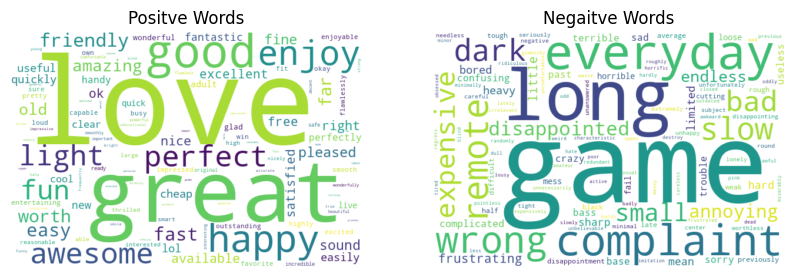

In [34]:
fig, ax = plt.subplots(1, 2, figsize= (10, 5))

ax[0].imshow(pos_wordcloud, interpolation='bilinear')
ax[0].set_title('Positve Words')
ax[0].axis('off')

ax[1].imshow(neg_wordcloud, interpolation='bilinear')
ax[1].set_title('Negaitve Words')
ax[1].axis('off')

plt.show()